In [67]:
# Import required package

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import preprocessing

import numpy as np

In [124]:
# read the dataset file
data_8th = pd.read_csv('Data_8th_Nov.csv')
data_16th = pd.read_csv('Data_16_original.csv')

# Deleting the first columns of sequence number
data_8th.drop(data_8th.columns[0],axis=1,inplace=True)
data_16th.drop(data_16th.columns[0],axis=1,inplace=True)

# Printing basic info of dataset
print 'Number of records & attributes for 8th Nov:',data_8th.shape
print 'Number of records & attributes for 16th Nov:',data_16th.shape


# Printing Column names
print([a for a in data_8th.columns])
print(data_8th.group.unique())
print(data_16th.group.unique())

Number of records & attributes for 8th Nov: (41, 12)
Number of records & attributes for 16th Nov: (77, 12)
['timestamp', 'group', 'disengaged', 'looking', 'talking', 'intTech', 'intRes', 'intExt', 'Accessed', 'Create', 'Open', 'Update']
['1ABCD' '2ABCD' '3ABCDE' '4ABCDE']
['1AB' '1CD' '1GF' '1HI' '2ABC' '2DE' '2FGH' '2IJ' '3AB' '3CD']


In [125]:
# Deleting timestamp and group information
raw_data_8th = data_8th.drop(['timestamp','group'],axis=1)
raw_data_16th = data_16th.drop(['timestamp','group'],axis=1)

In [126]:
# Stadardizing the dataset
std_rawdata_8th = preprocessing.StandardScaler().fit_transform(raw_data_8th)

# MaxabsScaler scaling of dataset
maxa_rawdata_8th = preprocessing.MaxAbsScaler().fit_transform(raw_data_8th)


# Minmax scaling of dataset
min_rawdata_8th = preprocessing.MinMaxScaler().fit_transform(raw_data_8th)


# For 16Nov dataset
# Stadardizing the dataset
std_rawdata_16th = preprocessing.StandardScaler().fit_transform(raw_data_16th)

# MaxabsScaler scaling of dataset
maxa_rawdata_16th = preprocessing.MaxAbsScaler().fit_transform(raw_data_16th)


# Minmax scaling of dataset
min_rawdata_16th = preprocessing.MinMaxScaler().fit_transform(raw_data_16th)

In [127]:
# Building PCA
pca_8th = decomposition.PCA(n_components = 2)


# Applying PCA on data 
pca_data2d_8th = pca.fit_transform(std_rawdata_8th)


# Building PCA
pca_16th = decomposition.PCA(n_components = 2)


# Applying PCA on data 
pca_data2d_16th = pca.fit_transform(std_rawdata_16th)



# Adding resultant dimensions of PCA to data
raw_data_8th['pc-1'] = pca_data2d_8th[:,0]
raw_data_8th['pc-2'] = pca_data2d_8th[:,1]


# MFA was applied using another python library (which is not the part of anaconda libraries)
mfa_df = pd.read_csv('mfaresult_8th.csv')
mfa_df1 = pd.read_csv('mfaresult_16th.csv')

# Adding resultant dimensions of MFA to data
raw_data_8th['mfa-1'] = mfa_df.iloc[:,1]
raw_data_8th['mfa-2'] = mfa_df.iloc[:,2]

# Adding resultant dimensions of MFA to data
raw_data_16th['mfa-1'] = mfa_df1.iloc[:,1]
raw_data_16th['mfa-2'] = mfa_df1.iloc[:,2]



<IPython.core.display.Javascript object>


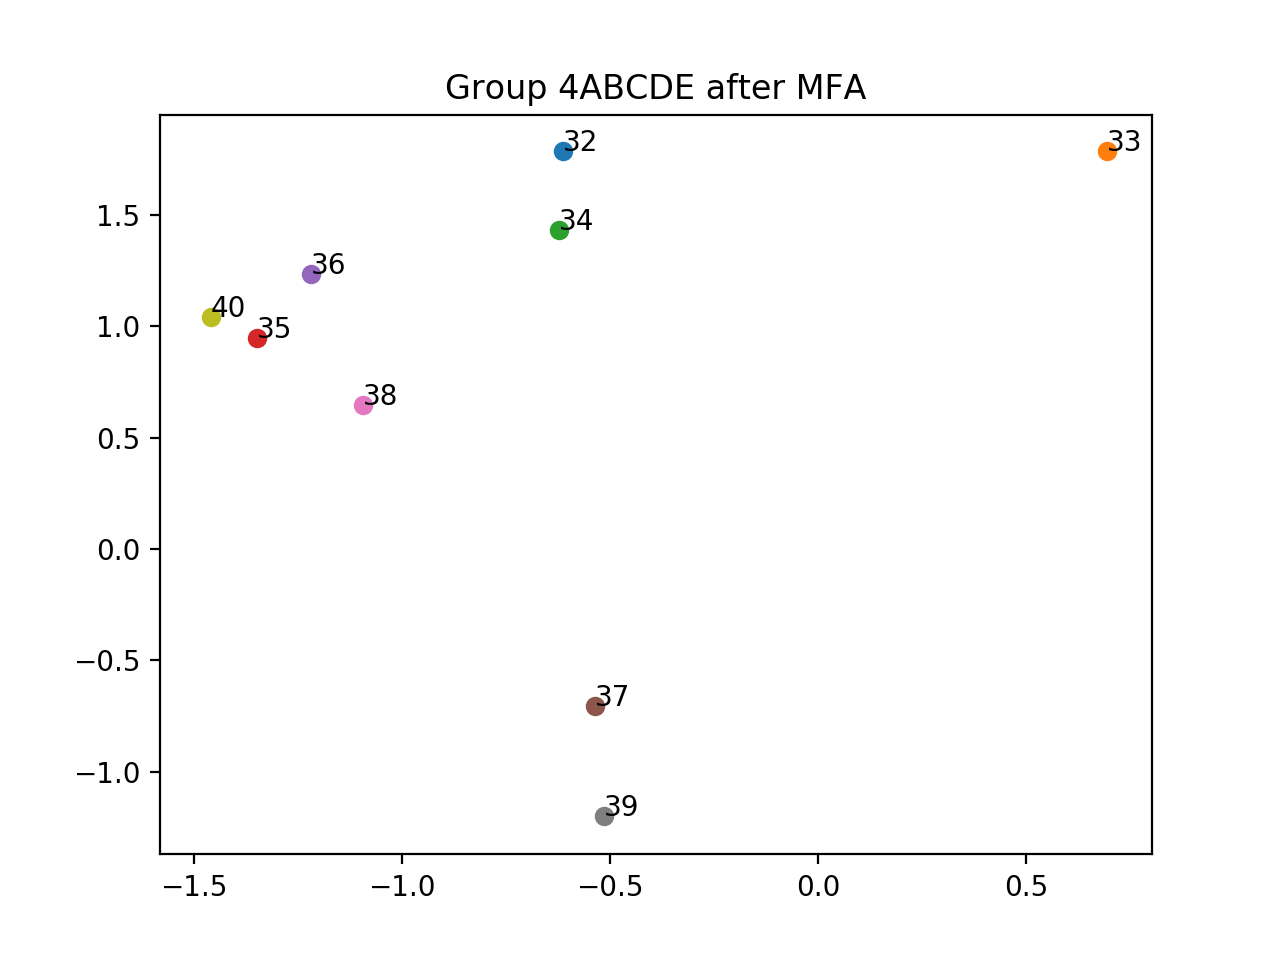

In [96]:
# Plotting MFA results for every group
#%matplotlib notebook
# for group 1AB
group = '4ABCDE'

mf_1AB = raw_data_8th.loc[data_8th.group==group,:]
figure1 = plt.figure()
ax1 = figure1.add_subplot(111)
for index in mf_1AB.index:
    ax1.scatter(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2'])
    ax1.annotate(index,xy=(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2']),xytext=(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2']))
plt.title('Group %s after MFA' % group)
plt.savefig('%s.png'%group)
plt.show()

<IPython.core.display.Javascript object>


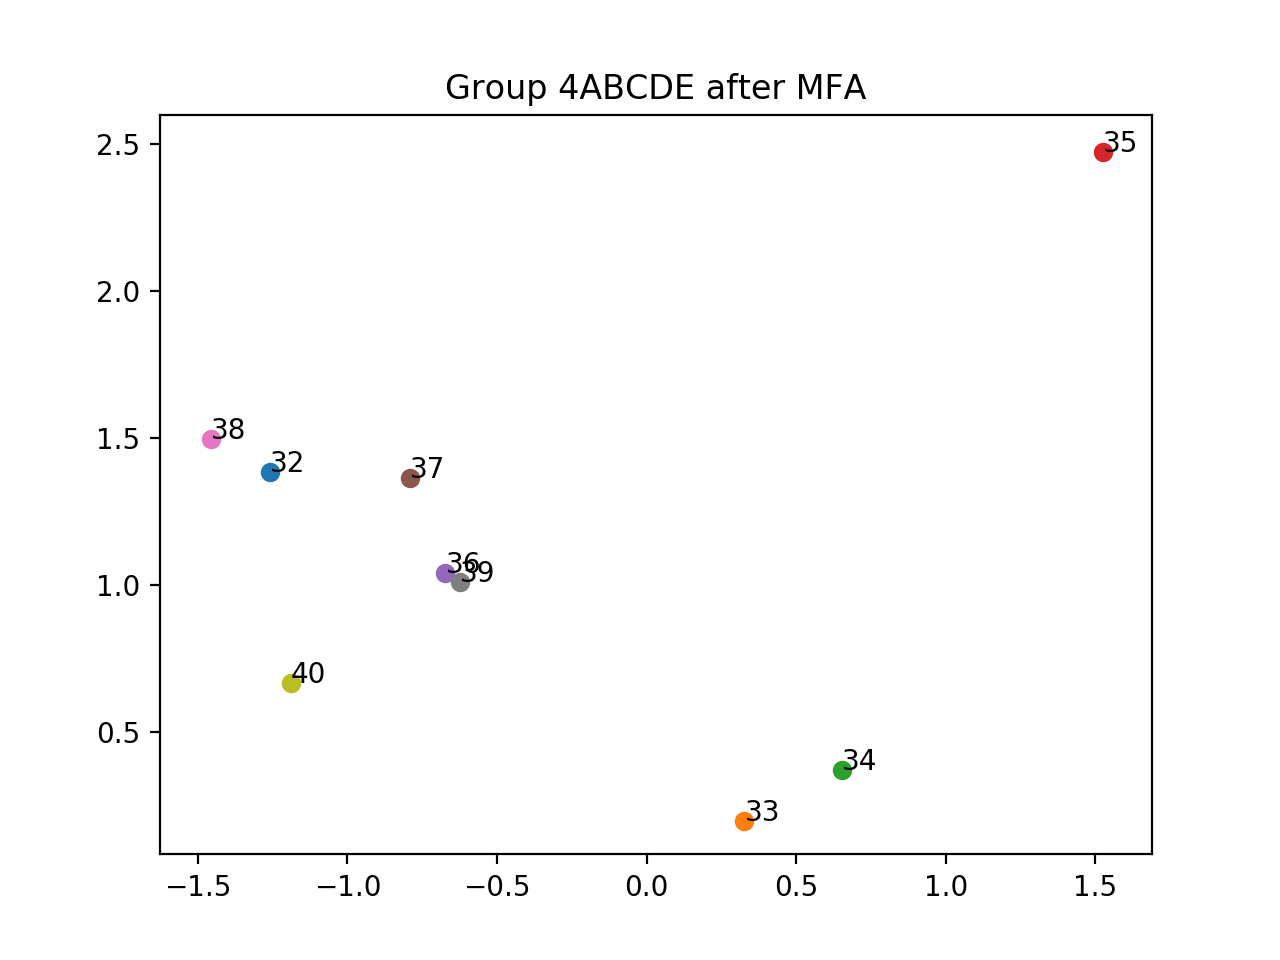

In [128]:
# Plotting MFA results for every group for 16th Nov 

group = '4ABCDE'

mf_1AB = raw_data.loc[data.group==group,:]
figure1 = plt.figure()
ax1 = figure1.add_subplot(111)
for index in mf_1AB.index:
    ax1.scatter(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2'])
    ax1.annotate(index,xy=(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2']),xytext=(mf_1AB.loc[index,'mfa-1'],mf_1AB.loc[index,'mfa-2']))
plt.title('Group %s after MFA' % group)
plt.savefig('%s.png'%group)
plt.show()

<IPython.core.display.Javascript object>


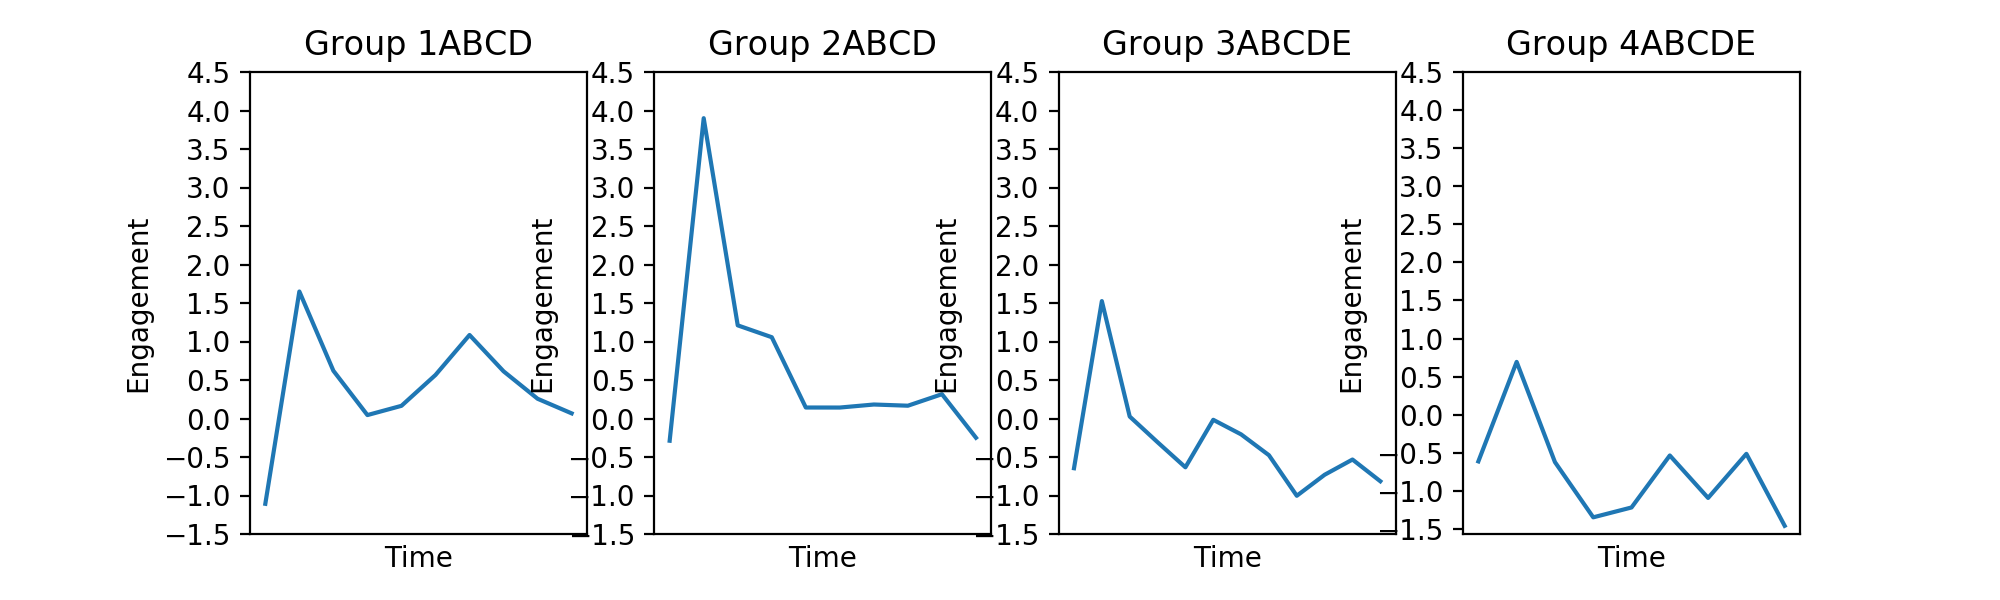

In [98]:
#Plotting for 8th Nov Project days' data
fig = plt.figure(figsize =(10,3))
index=1
for group in data_8th.group.unique():
    mf_group = raw_data_8th.loc[data_8th.group==group,:]

    ax = fig.add_subplot(1,4,index)
    plt.plot(mf_group.index,mf_group.loc[data_8th.group==group,'mfa-1'])
    plt.xlabel('Time')
    plt.ylabel('Engagement')
    plt.yticks(np.arange(-1.5,5,.5))
    plt.title('Group '+group)
    index = index+1
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig('time-wise_8th.png')
plt.show()

<IPython.core.display.Javascript object>


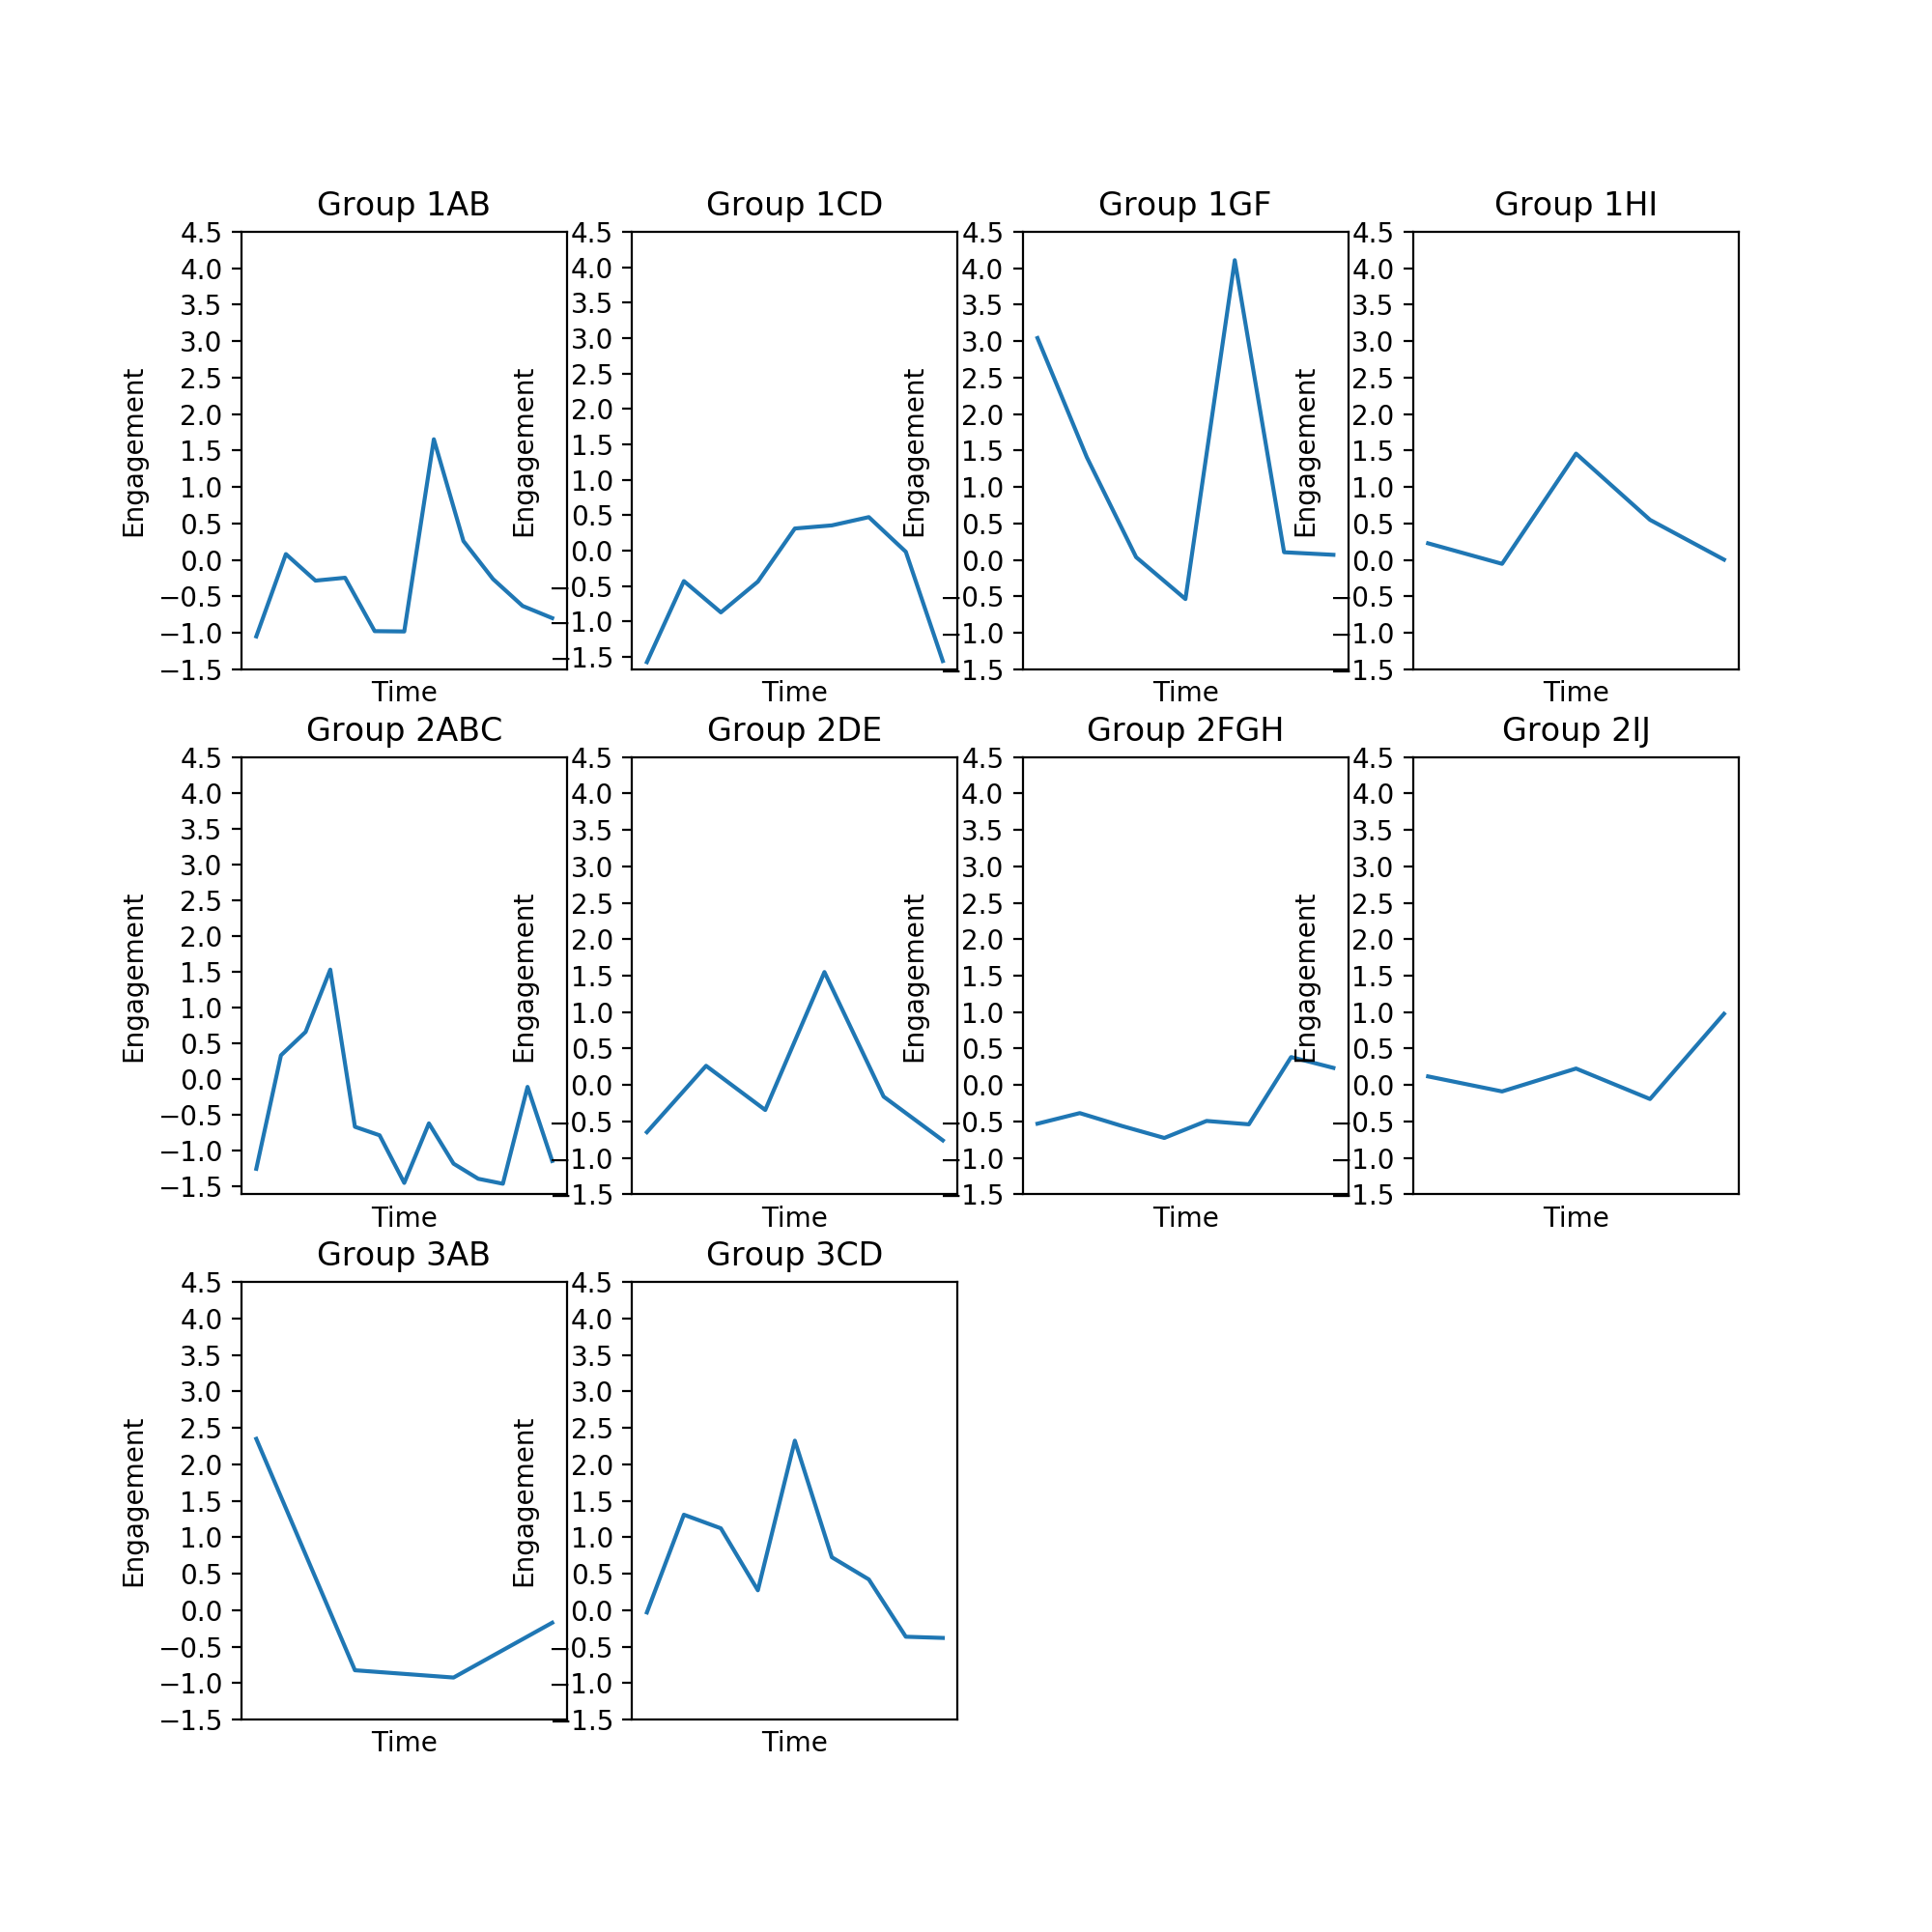

In [82]:
# Plotting for 16th Nov Project days' data
fig = plt.figure(figsize =(10,10))
index=1
for group in data_16th.group.unique():
    mf_group = raw_data_16th.loc[data_16th.group==group,:]

    ax = fig.add_subplot(3,4,index)
    plt.plot(mf_group.index,mf_group.loc[data_16th.group==group,'mfa-1'])
    plt.xlabel('Time')
    plt.ylabel('Engagement')
    plt.yticks(np.arange(-1.5,5,.5))
    plt.title('Group '+group)
    index = index+1
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig('time-wise_16th.png')
plt.show()

In [130]:
# Plotting overall engagement plot for each group for 8th Nov data

def get_above_avg(x,avg):
    if ( x > avg):
        return 1
    else:
        return 0
    
    

def get_above_avg1(x,avg):
    if ( x > avg):
        return x-avg
    else:
        return 0    

8.12358310701e-17


<IPython.core.display.Javascript object>


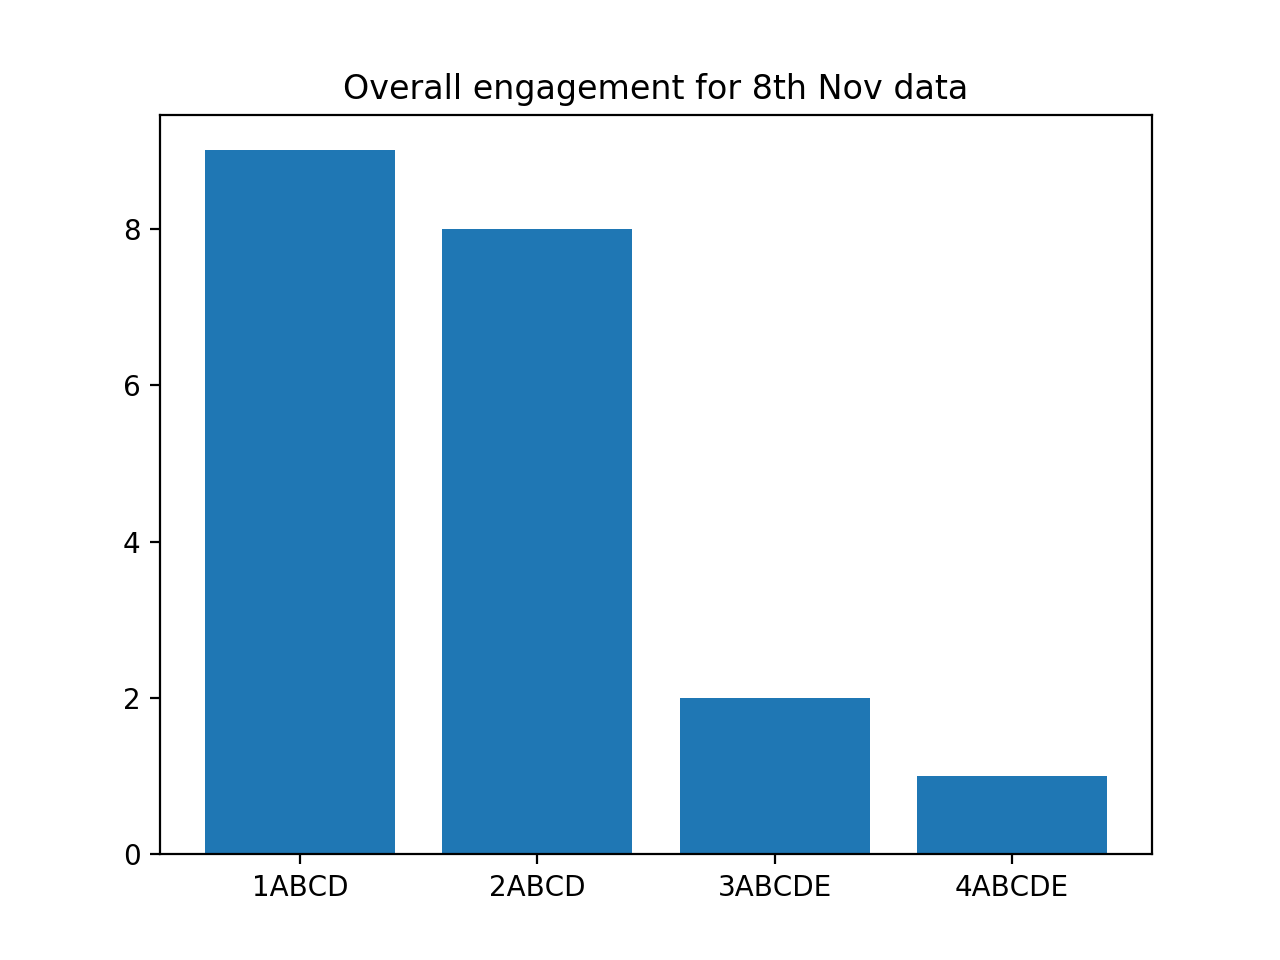

In [92]:


avg_engagement = raw_data_8th['mfa-1'].mean()
print avg_engagement
groups=list()
performance = list()
for group in data_8th.group.unique():
    groups.append(group)
    p = raw_data_8th.loc[data_8th.group == group,'mfa-1']
    count_avg = p.apply(get_above_avg,args=(avg_engagement,))
    performance.append(count_avg.sum())
plt.figure()
plt.bar(groups,performance)
plt.title('Overall engagement for 8th Nov data')
plt.savefig('Above average engagment_8th.png')

plt.show()

-5.47902271893e-17


<IPython.core.display.Javascript object>


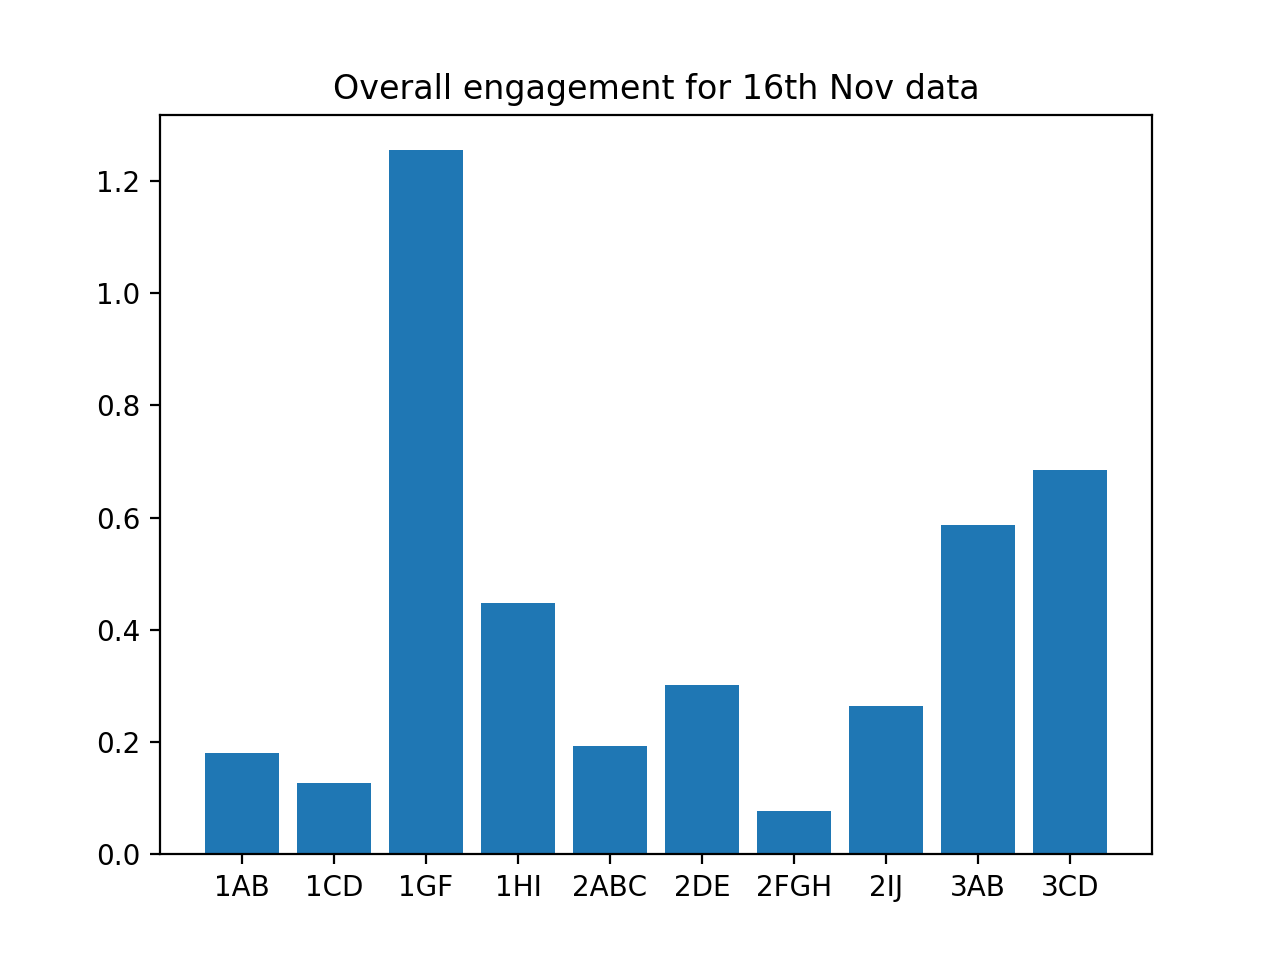

In [136]:
# Plotting overall engagement for 16th engagement data
avg_engagement = raw_data_16th['mfa-1'].mean()
print avg_engagement
groups=list()
performance = list()
for group in data_16th.group.unique():
    groups.append(group)
    
    p = raw_data_16th.loc[data_16th.group == group,'mfa-1']
    count_avg = p.apply(get_above_avg,args=(avg_engagement,))
    count_avg1 = p.apply(get_above_avg1,args=(avg_engagement,))
    performance.append(count_avg1.sum()/float(count_avg.count()))
    #performance.append(p.sum())
plt.figure()
plt.bar(groups,performance)
plt.title('Overall engagement for 16th Nov data')
plt.savefig('Above average engagment_16th-try1.png')

plt.show()

In [106]:
# Combined Analysis
data_both = pd.concat([data_8th,data_16th])
print (data_both.shape)

(118, 12)


In [107]:
#data_both.to_csv('8th16th.csv')
print data_both.columns

Index([u'timestamp', u'group', u'disengaged', u'looking', u'talking',
       u'intTech', u'intRes', u'intExt', u'Accessed', u'Create', u'Open',
       u'Update'],
      dtype='object')


In [115]:


mfa_df = pd.read_csv('mfaresult_both.csv')

data_both = pd.read_csv('8th16th.csv')
raw_data_both = data_both.drop(['timestamp','group'],axis=1)
# Adding resultant dimensions of MFA to data
raw_data_both['mfa-1'] = mfa_df.iloc[:,1]
raw_data_both['mfa-2'] = mfa_df.iloc[:,2]
print raw_data_both.index

RangeIndex(start=0, stop=118, step=1)


<IPython.core.display.Javascript object>


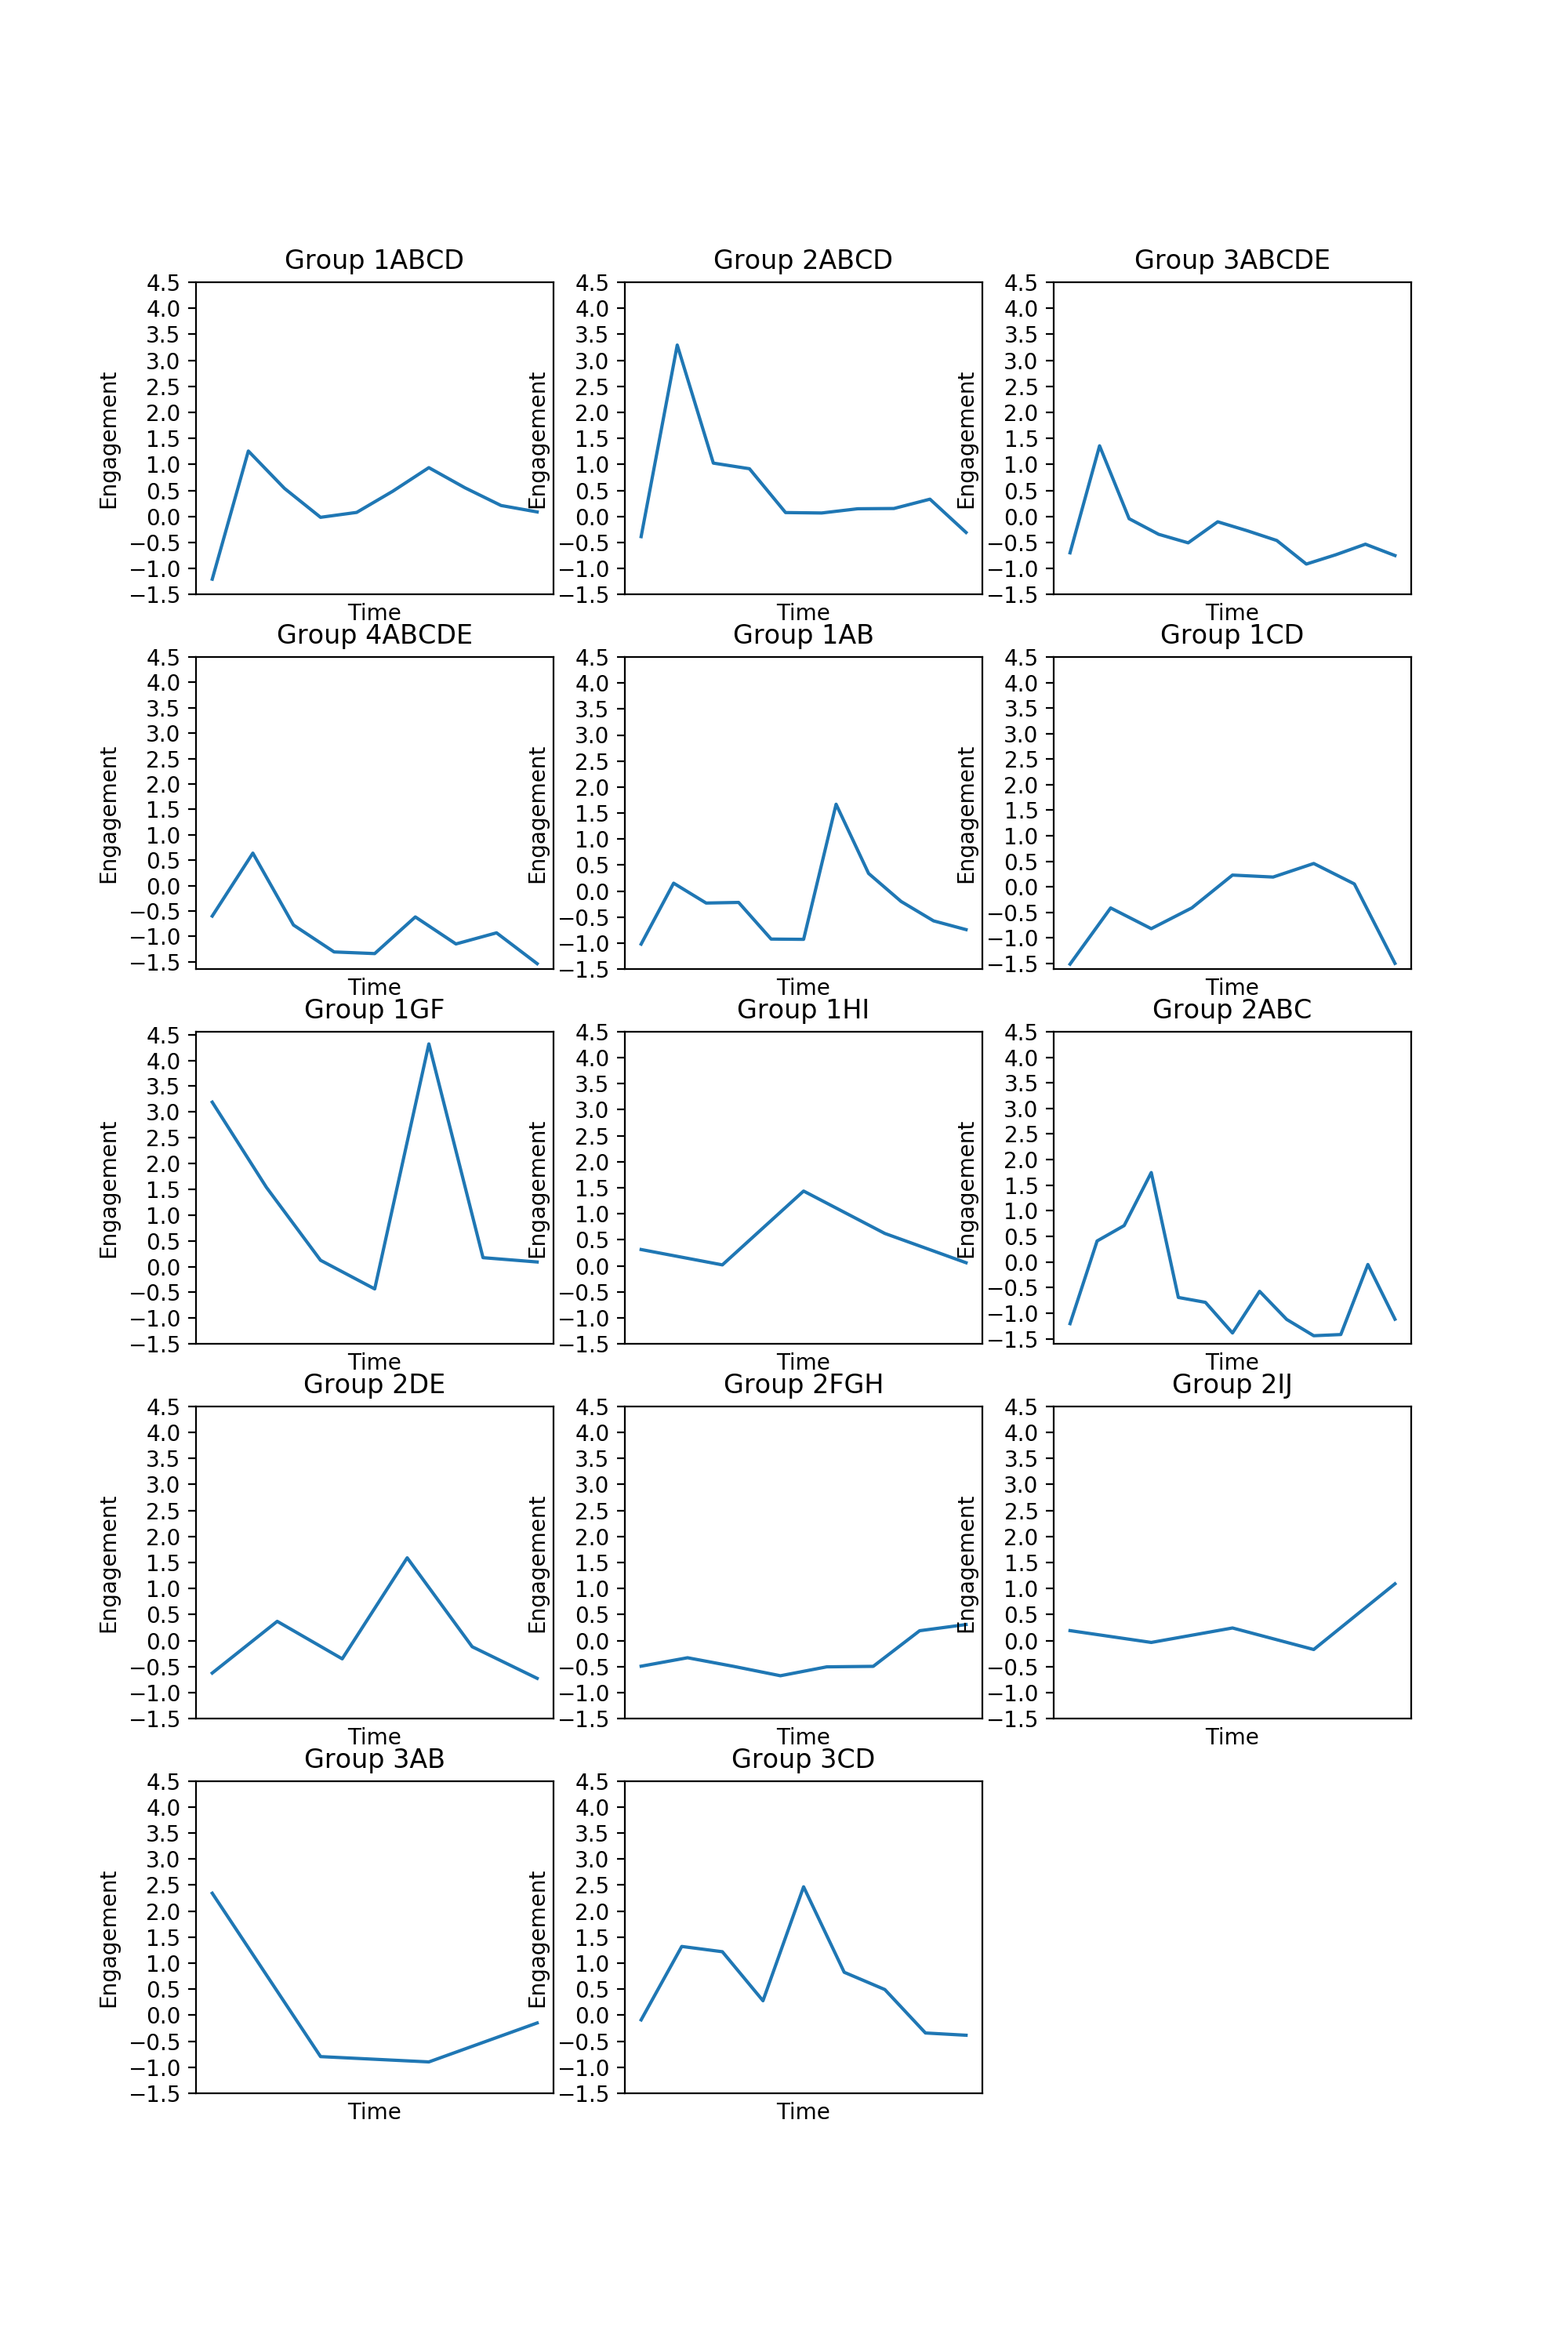

In [118]:
# Plotting for 8th and 16th Nov Project days' data
fig = plt.figure(figsize =(10,15))
index=1
for group in data_both.group.unique():
    mf_group = raw_data_both.loc[data_both.group==group,:]

    ax = fig.add_subplot(5,3,index)
    plt.plot(mf_group.index,mf_group.loc[data_both.group==group,'mfa-1'])
    plt.xlabel('Time')
    plt.ylabel('Engagement')
    plt.yticks(np.arange(-1.5,5,.5))
    plt.title('Group '+group)
    index = index+1
    plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig('time-wise_both.png')
plt.show()

4.93955159261e-17


<IPython.core.display.Javascript object>


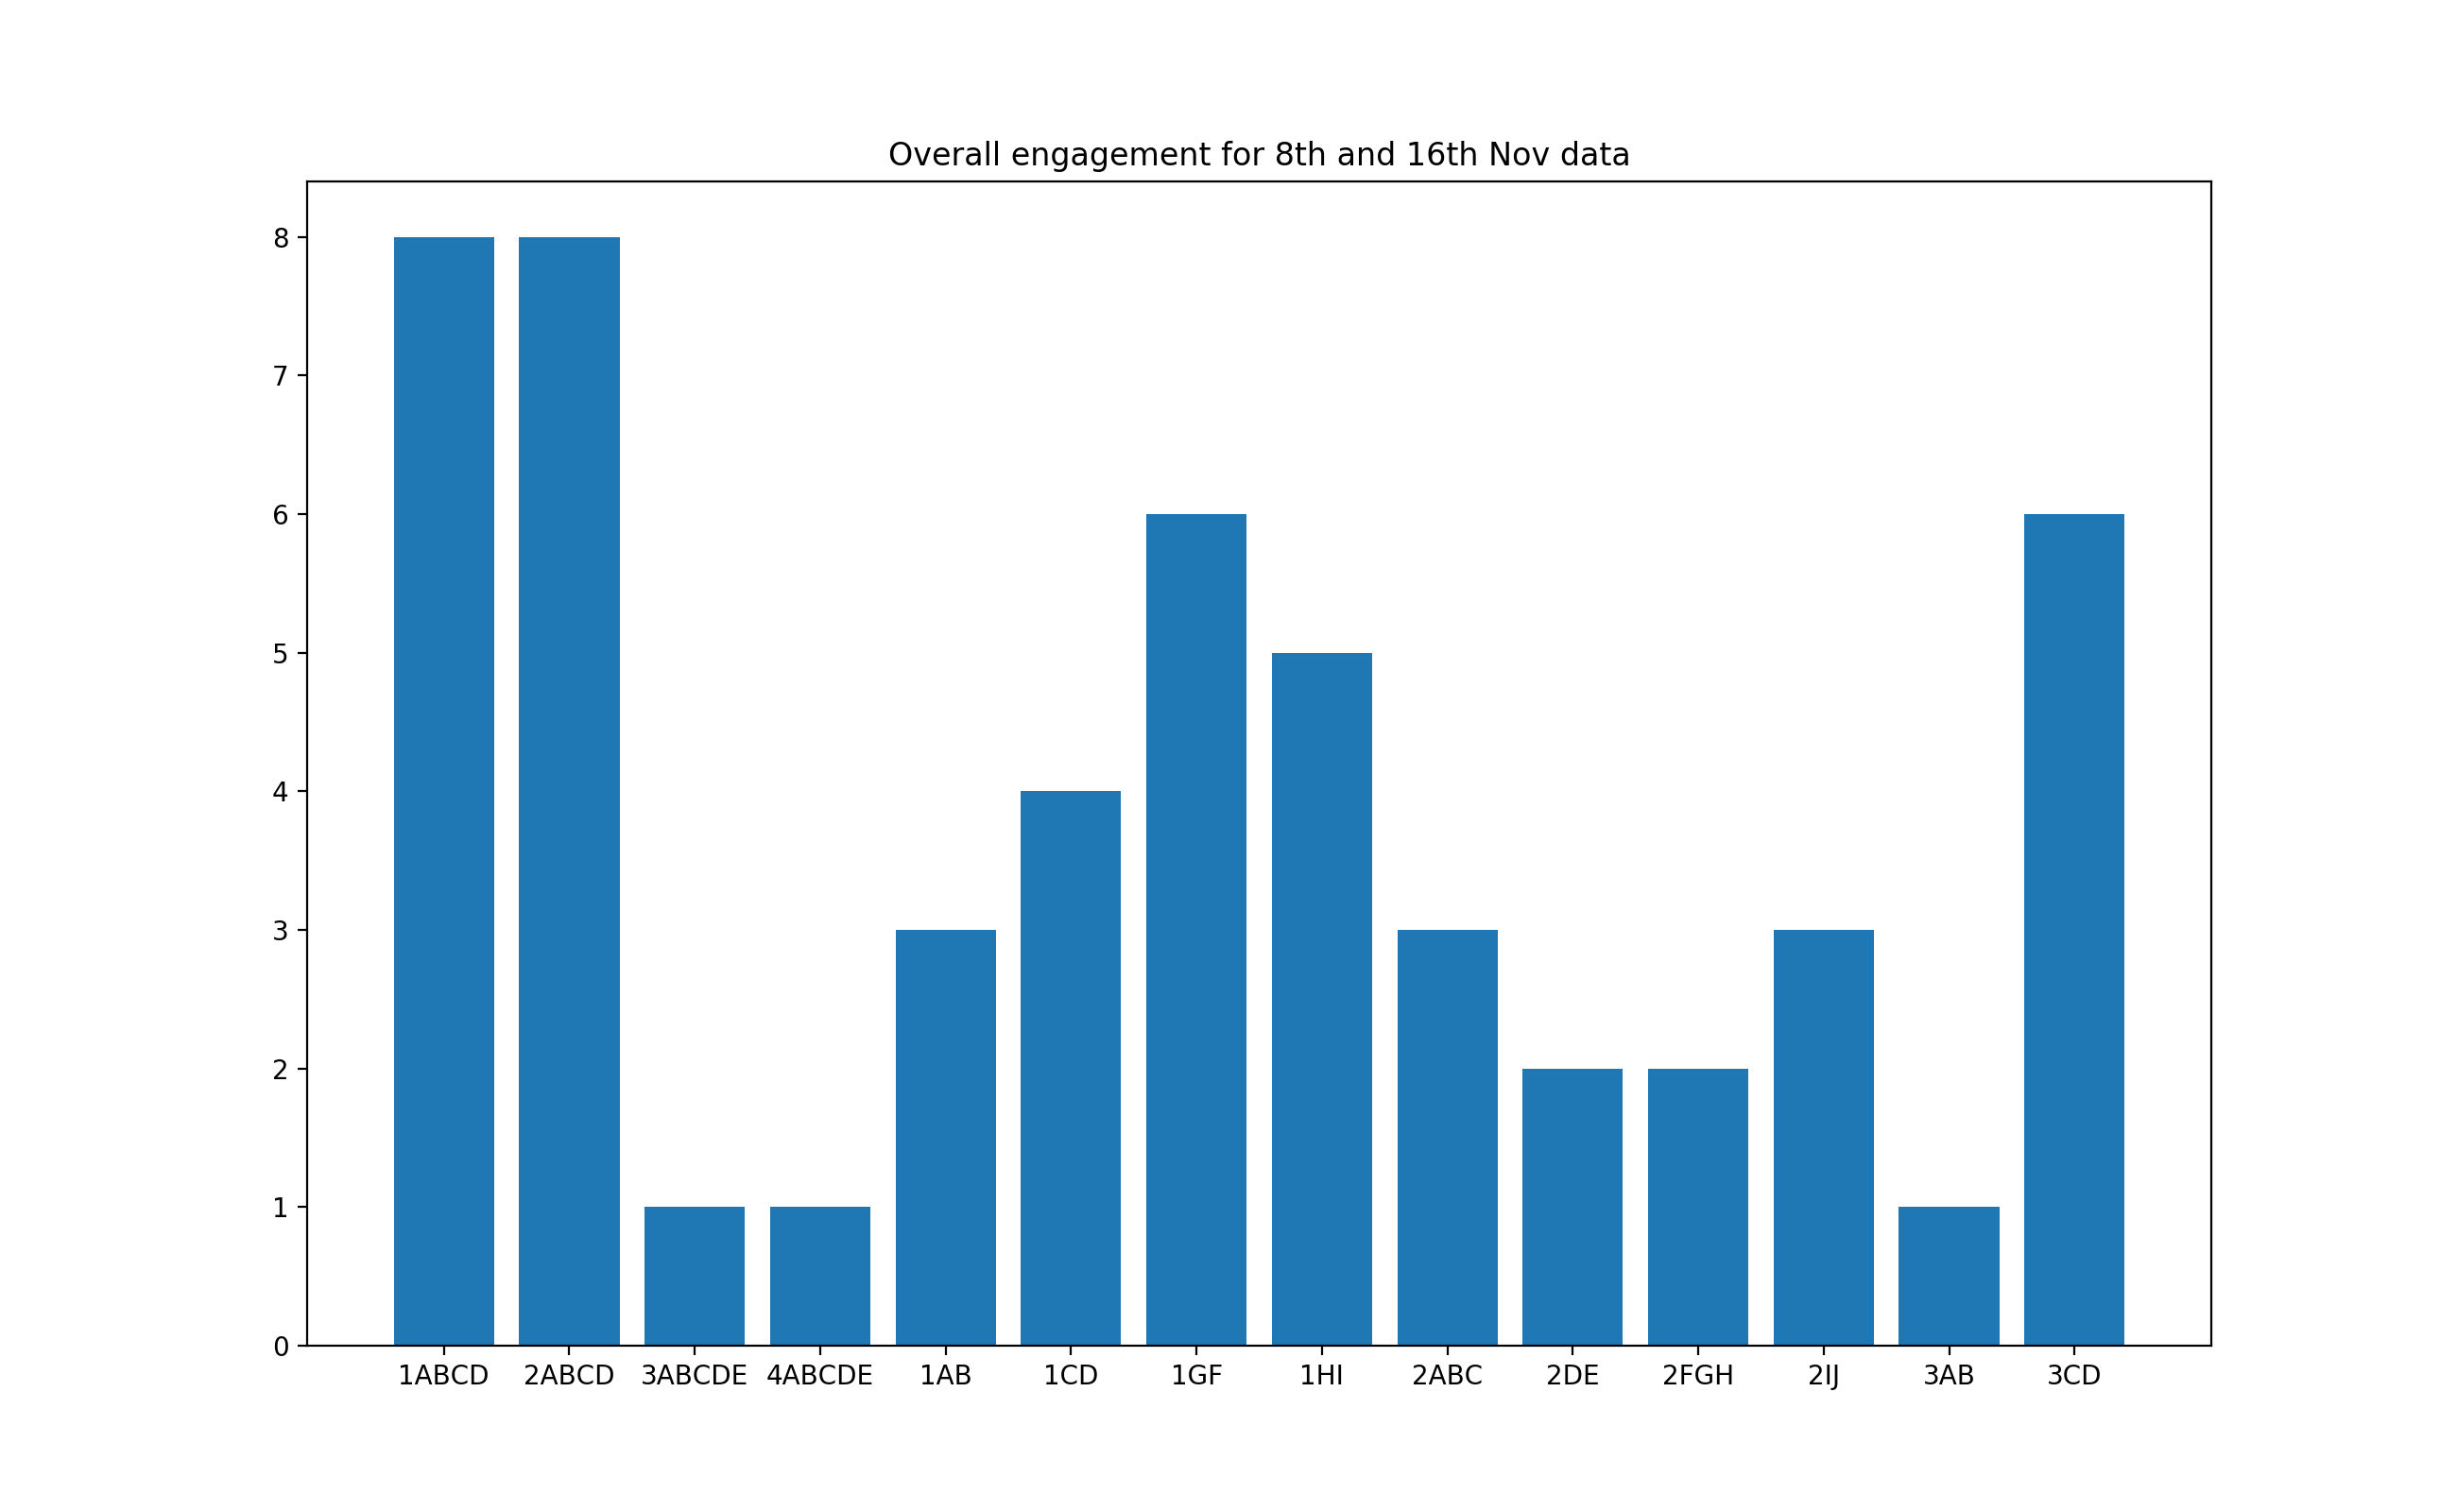

In [123]:
avg_engagement = raw_data_both['mfa-1'].mean()
print avg_engagement
groups=list()
performance = list()
for group in data_both.group.unique():
    groups.append(group)
    p = raw_data_both.loc[data_both.group == group,'mfa-1']
    count_avg = p.apply(get_above_avg,args=(avg_engagement,))
    performance.append(count_avg.sum())
plt.figure(figsize=(13,8))
plt.bar(groups,performance)
plt.title('Overall engagement for 8th and 16th Nov data')
plt.savefig('Above average engagment_both.png')

plt.show()